In [134]:
import pandas as pd

# Dataset
data = pd.read_csv("C:/Users/yacoo/lulc-air-quality/dataset/data.csv")

(0.000133, 0.000156]    30786
(0.000156, 0.000179]    36212
Name: NO2_column_number_density, dtype: int64


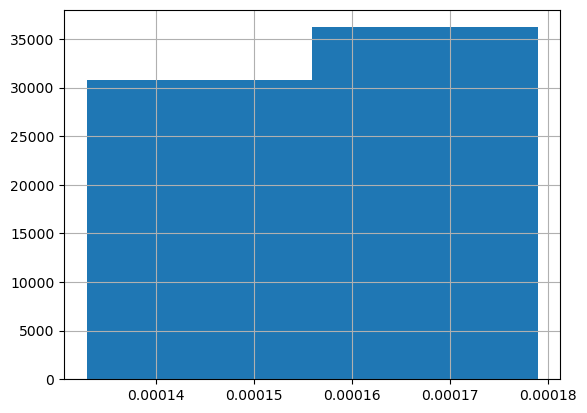

In [137]:
# Just to understand the dist. more
bins = pd.cut(data['NO2_column_number_density'], 2)
print(bins.value_counts(sort=False))
# Visually showing what it would mean to discretize the bins into categorical attributes
data['NO2_column_number_density'].hist(bins=2)

In [138]:
# Discretize the attributes using equal width method
data['NO2_column_number_density'] = pd.cut(x=data['NO2_column_number_density'], labels=["Not Polluted", "Polluted"], bins=2)

print(data['NO2_column_number_density'].head(100))

0     Not Polluted
1     Not Polluted
2     Not Polluted
3     Not Polluted
4     Not Polluted
          ...     
95        Polluted
96        Polluted
97        Polluted
98        Polluted
99        Polluted
Name: NO2_column_number_density, Length: 100, dtype: category
Categories (2, object): ['Not Polluted' < 'Polluted']


In [139]:
# Exclude relationship to be between land and air quality
data = data[data.columns.drop(['bare', 'crops', 'flooded_vegetation', 'grass', 'shrub_and_scrub', 'snow_and_ice', 'trees', 'water'])]

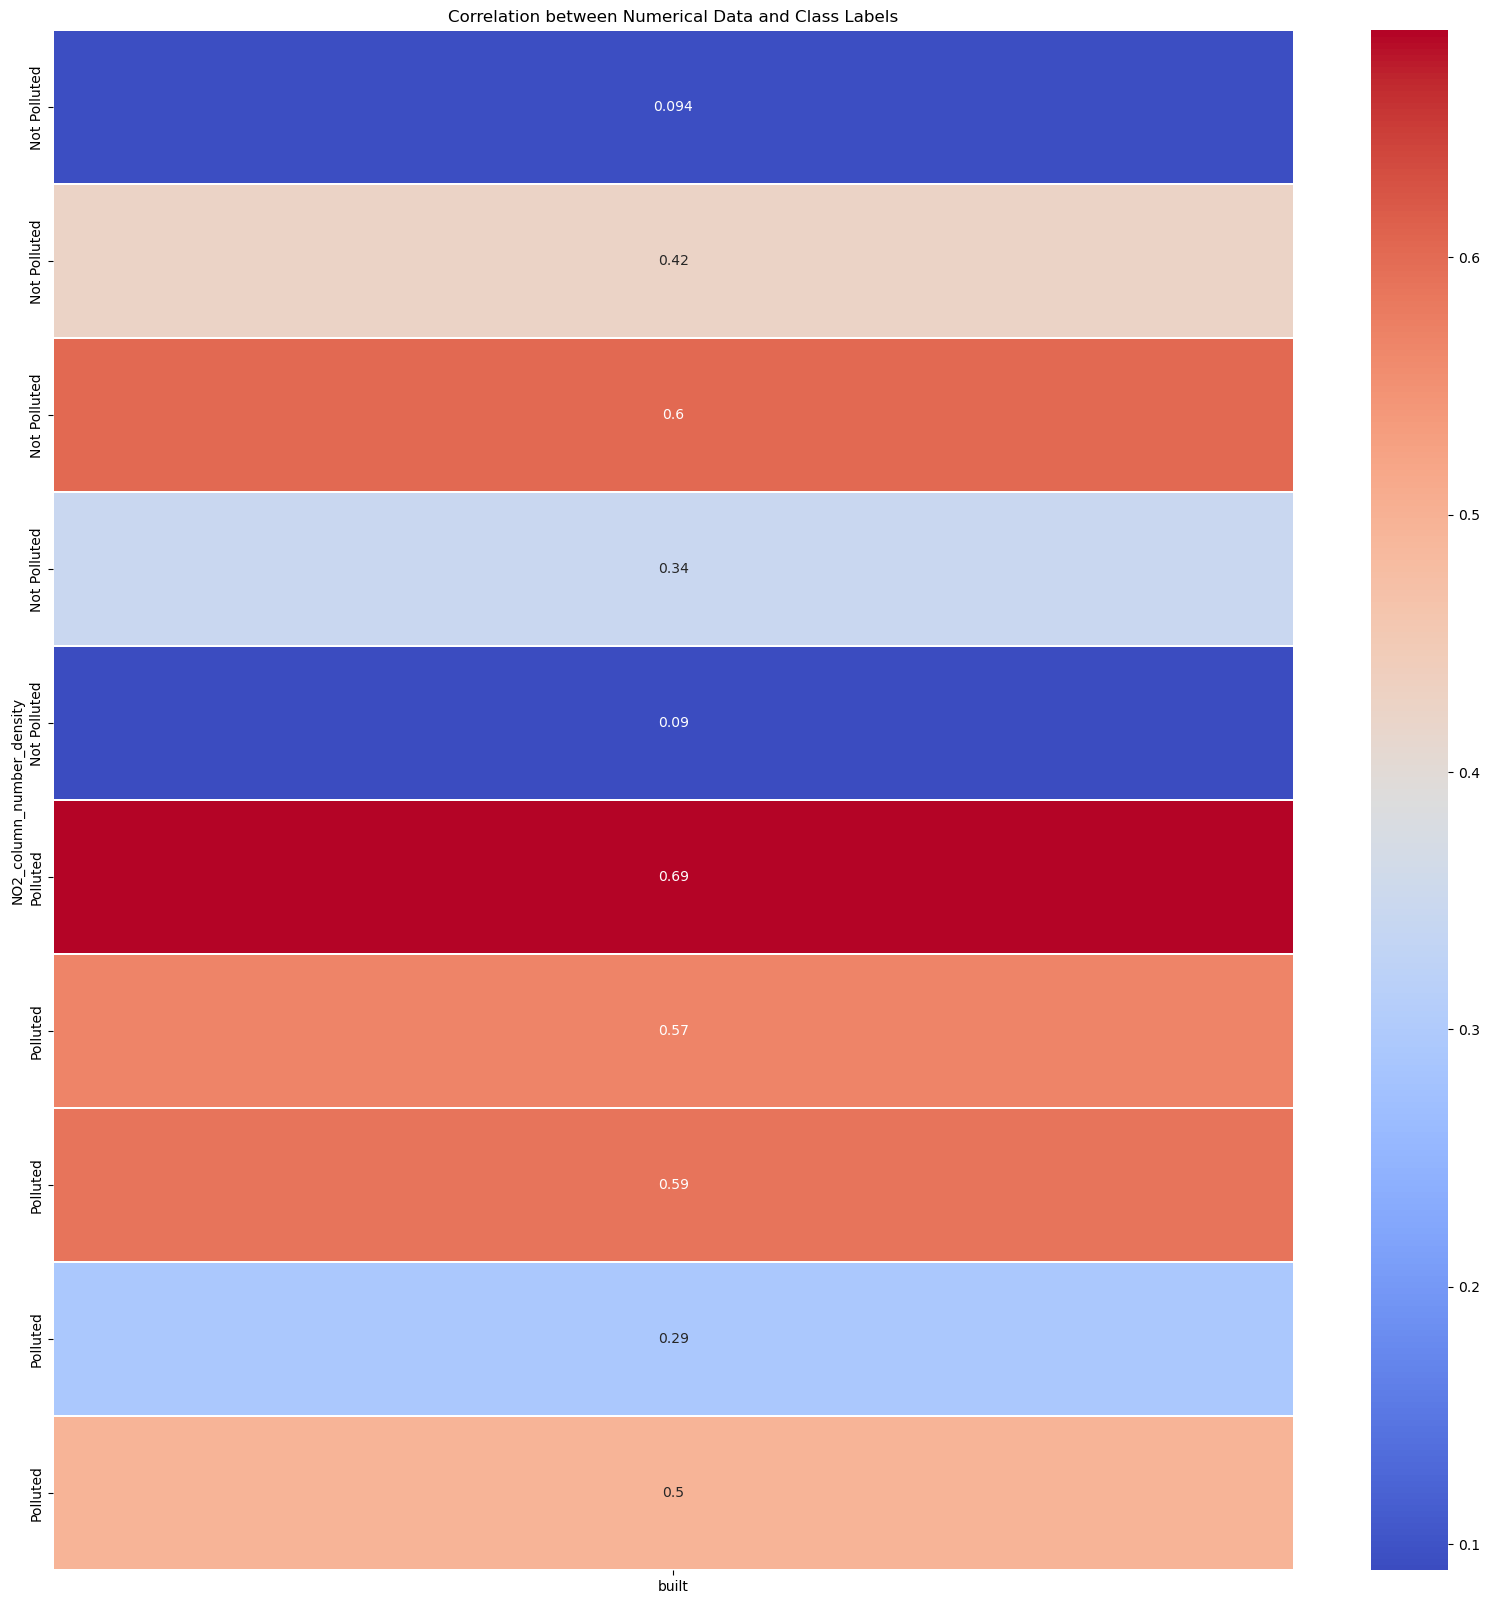

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

sample = data.sample(n=10) 

sample.set_index('NO2_column_number_density', inplace=True)
sample = sample.sort_index()

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(sample, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation between Numerical Data and Class Labels')
plt.show()


In [141]:
# Drop the target output from the input train set
X = data[data.columns.drop('NO2_column_number_density')]
print("Input Attributes: ", X)
# Set the target output to the output train set
y = data['NO2_column_number_density']
print("Training Labels: ", y)

Input Attributes:         built
0       0.03
1       0.03
2       0.05
3       0.15
4       0.31
...      ...
66993   0.65
66994   0.65
66995   0.69
66996   0.71
66997   0.72

[66998 rows x 1 columns]
Training Labels:  0        Not Polluted
1        Not Polluted
2        Not Polluted
3        Not Polluted
4        Not Polluted
             ...     
66993        Polluted
66994        Polluted
66995        Polluted
66996        Polluted
66997        Polluted
Name: NO2_column_number_density, Length: 66998, dtype: category
Categories (2, object): ['Not Polluted' < 'Polluted']


In [142]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Based on the dist. of the histogram
# class_weights_custom = {"Extremely Low": 0.05, "Very Low": 0.80, "Low": 1, "Medium": .80, "High": 0.60, "Very High": 0.30, "Extremely High": 0.50}

# DTC
dtc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features=None, class_weight=None)

# Train the model
dtc.fit(X_train, y_train)

# Predictions on the test set
y_pred = dtc.predict(X_test)

# Eval
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [143]:
print("Accuracy: ", accuracy)
print(report)

Accuracy:  0.6045522388059702
              precision    recall  f1-score   support

Not Polluted       0.55      0.70      0.62      6140
    Polluted       0.67      0.52      0.59      7260

    accuracy                           0.60     13400
   macro avg       0.61      0.61      0.60     13400
weighted avg       0.62      0.60      0.60     13400



In [144]:
correlation_matrix = data.corr()
print("correlation_matrix: ", correlation_matrix)

correlation_matrix:         built
built   1.00


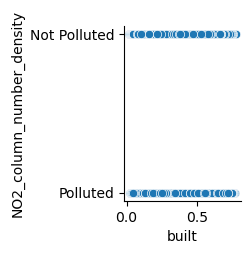

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Understanding the relationship between air quality attr. related to the LULC class labels
sns.pairplot(data, x_vars=['built'], y_vars='NO2_column_number_density', kind='scatter')
plt.show()

In [146]:
# Drop the target output from the input train set
X = data[data.columns.drop('NO2_column_number_density')]
print("Input Attributes: ", X)
# Set the target output to the output train set
y = data['NO2_column_number_density']
print("Training Labels: ", y)

Input Attributes:         built
0       0.03
1       0.03
2       0.05
3       0.15
4       0.31
...      ...
66993   0.65
66994   0.65
66995   0.69
66996   0.71
66997   0.72

[66998 rows x 1 columns]
Training Labels:  0        Not Polluted
1        Not Polluted
2        Not Polluted
3        Not Polluted
4        Not Polluted
             ...     
66993        Polluted
66994        Polluted
66995        Polluted
66996        Polluted
66997        Polluted
Name: NO2_column_number_density, Length: 66998, dtype: category
Categories (2, object): ['Not Polluted' < 'Polluted']


In [147]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Based on the dist. of the histogram
# class_weights_custom = {"Extremely Low": 0.05, "Very Low": 0.80, "Low": 1, "Medium": .80, "High": 0.60, "Very High": 0.30, "Extremely High": 0.50}

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions for class labels
y_pred = rf_clf.predict(X_test)

# Eval
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [148]:
print("Accuracy: ", accuracy)
print(report)

Accuracy:  0.5485074626865671
              precision    recall  f1-score   support

Not Polluted       0.51      0.52      0.52      6140
    Polluted       0.59      0.57      0.58      7260

    accuracy                           0.55     13400
   macro avg       0.55      0.55      0.55     13400
weighted avg       0.55      0.55      0.55     13400



In [149]:
# Determining what attr. hold % of class labels
feature_importance = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

built   1.00
dtype: float64


In [19]:
!pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.3/1.3 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 99.8/99.8 MB 3.0 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [20]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [25:18<03:28, 69.64s/it]

[LightGBM] [Info] Number of positive: 24646, number of negative: 28952
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 53598, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.459831 -> initscore=-0.161025
[LightGBM] [Info] Start training from score -0.161025


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [25:19<00:00, 52.39s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.76               0.76    None      0.76   
NuSVC                              0.76               0.76    None      0.76   
ExtraTreesClassifier               0.76               0.76    None      0.76   
LGBMClassifier                     0.75               0.75    None      0.75   
SVC                                0.75               0.75    None      0.75   
KNeighborsClassifier               0.74               0.73    None      0.74   
BaggingClassifier                  0.74               0.73    None      0.73   
AdaBoostClassifier                 0.72               0.72    None      0.72   
DecisionTreeClassifier             0.68               0.68    None      0.68   
QuadraticDiscriminantAnalysis      0.67               0.67    None      0.67   
ExtraTreeClassifier                0.66 